In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#! /usr/bin/env python

import pandas
import re
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import *
from nltk.stem.porter import *

# =-=-=-=-=-=
# Read CSV into DataFrame and then create lists
# =-=-=-=-=-=

# Create pandas dataframe
colnames = ['author', 'title', 'date' , 'length', 'text']
df = pandas.read_csv('../data/talks_3.csv', names=colnames)

# Create list of talks
talks = df.text.tolist()

# List of word counts for each talk 
counts = [len(re.findall("[a-zA-Z_]+", talk)) for talk in talks]

In [3]:
print(min(counts), max(counts), mean(counts))

368 6610 2172.71615087


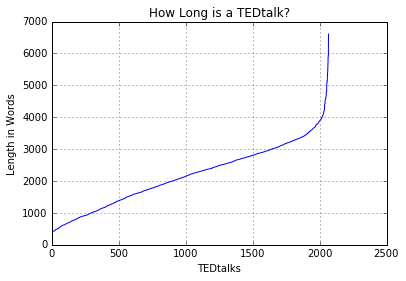

In [4]:
# =-=-=-=-=-=-=-=-=-=-=
# Plot of Word Lengths
# =-=-=-=-=-=-=-=-=-=-= 

import matplotlib.pyplot as plt
import numpy as np


length_sorted = sorted(counts)
plt.plot(length_sorted)

plt.xlabel('TEDtalks')
plt.ylabel('Length in Words')
plt.title('How Long is a TEDtalk?')
plt.grid(True)
plt.show()

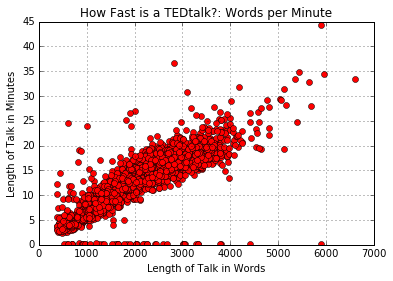

In [5]:
# =-=-=-=-=-=-=-=-=-=-=
# Plot of Talk Speed
# =-=-=-=-=-=-=-=-=-=-= 

# We are going to grab the length (in seconds) from the dataframe 
# and convert to minutes all in one go here:
minutes = [ item / 60 for item in df.length.tolist() ]

plt.plot(counts, minutes, 'ro')
plt.xlabel('Length of Talk in Words')
plt.ylabel('Length of Talk in Minutes')
plt.title('How Fast is a TEDtalk?: Words per Minute')
plt.grid(True)
plt.show()

What are those talks on the floor of the graph? Something has to be broken there. >>> We need a bigger graph and labels to "see" what those are. Or, I can do this in a list or dataframe and see where the zeroes are.

Otherwise: I'm curious about the talks that are slowing than the clear average here: those that hang above the cloud.

In [6]:
# =-=-=-=-=-=-=-=-=-=-=
# Corpus Word Frequencies: RAW
# =-=-=-=-=-=-=-=-=-=-= 

import csv

# Mash all the talks together
alltalks = " ".join(talks)

# Remove all punctuation save apostrophes
all_words = re.sub(r"[^\w\d'\s]+",'',alltalks).lower()

# Tokenize on whitespace with NLTK
tt_tokens = WhitespaceTokenizer().tokenize(all_words)

# Build a dictionary of words and their frequency in the corpus
tt_freq = {}
for word in tt_tokens:
    try:
        tt_freq[word] += 1
    except: 
        tt_freq[word] = 1

# Convert dictionary into a list of tuples
tt_freq_list = [(val, key) for key, val in tt_freq.items()]

# Sort with most frequent words at top
tt_freq_list.sort(reverse=True)

# Write to file
with open('../outputs/tt_word_freq.csv', 'w') as f:
        wtr = csv.writer(f)
        wtr.writerows(sorted(tt_freq_list, reverse=True))
        f.close()

In [11]:
# =-=-=-=-=-=-=-=-=-=-=
# Corpus Word Frequencies: STEMMED
# =-=-=-=-=-=-=-=-=-=-= 

import nltk

p_stemmer = PorterStemmer()

stemmed_tokens = [p_stemmer.stem(i) for i in tt_tokens]

# Build the dictionary
tt_stem_freq = {}
for word in stemmed_tokens:
    try:
        tt_stem_freq[word] += 1
    except: 
        tt_stem_freq[word] = 1

# Convert dictionary into a list of tuples
tt_stem_list = [(val, key) for key, val in tt_stem_freq.items()]

# Sort with most frequent words at top
# tt_stem_list.sort(reverse=True)

# Write to file
with open('../outputs/tt_stem_freq.csv', 'w') as f:
        wtr = csv.writer(f)
        wtr.writerows(sorted(tt_stem_list, reverse=True))
        f.close()